In [1]:
from math import *


def soft(x):
    CALC_ERROR = 12
    x = round(x, CALC_ERROR)
    return 0 if isclose(x, 0) else x


def ceil_f(x, n):
    return ceil(x * (10 ** n)) / (10 ** n)


def floor_f(x, n):
    return floor(x * (10 ** n)) / (10 ** n)

In [2]:
# Экспериментальные данные (время: количество попадений)
experiment_data = {
    4.78: 4, 4.79: 1, 4.8: 0, 4.81: 4, 4.82: 1, 4.83: 0, 4.84: 4,
    4.85: 3, 4.86: 0, 4.87: 4, 4.88: 6, 4.89: 0, 4.9: 2, 4.91: 7, 
    4.92: 0, 4.93: 2, 4.94: 5, 4.95: 0, 4.96: 3, 4.97: 8, 4.98: 0, 
    4.99: 0, 5.0: 12, 5.01: 0, 5.02: 0, 5.03: 12, 5.04: 0, 5.05: 0, 
    5.06: 6, 5.07: 2, 5.08: 0, 5.09: 3, 5.1: 1, 5.11: 0, 5.12: 2, 
    5.13: 1, 5.14: 0, 5.15: 2, 5.16: 3, 5.17: 0, 5.18: 0, 5.19: 0, 
    5.2: 0, 5.21: 0, 5.22: 1, 5.23: 0, 5.24: 0, 5.25: 1
}
# Создаём список результатов измерений
data = []
for k, v in experiment_data.items():
    data.extend([k]*v)
# АЛЬТЕРНАТИВА: сразу заполнить список data

In [3]:
N = len(data)
print(f'Количество измерений N = {N}')

T = sum(data)/N
print(f'Сумма t = {sum(data)}')
print(f'Среднее T = {T} = {T:.4f}')

sum_t_T = soft(sum(t - T for t in data))
print(f'Сумма (t - T) = {sum_t_T}')

sum_t_T_square = soft(sum(((t - T)**2) for t in data))
print('Сумма (t - T)^2 =', sum_t_T_square)

sigma_N = (1/99 * sum_t_T_square)**0.5
print(f'Sigma N = {sigma_N} = {sigma_N:.4f}')

rho_max = 1/(sqrt(2*pi) * sigma_N)
print(f'Rho max = {rho_max} = {rho_max:.4f}')

Количество измерений N = 100
Сумма t = 496.86
Среднее T = 4.9686 = 4.9686
Сумма (t - T) = 0
Сумма (t - T)^2 = 1.111204
Sigma N = 0.10594471590543263 = 0.1059
Rho max = 3.76557034479693 = 3.7656


In [4]:
# Таблица "Результаты прямых измерений" LaTeX
table = ''
for i, t in enumerate(data):
    table += f'{i + 1} & {t:.2f} & {(t - T):.4f} & {(t - T)**2:.4f} \\\\ \\hline '
print(table)

1 & 4.78 & -0.1886 & 0.0356 \\ \hline 2 & 4.78 & -0.1886 & 0.0356 \\ \hline 3 & 4.78 & -0.1886 & 0.0356 \\ \hline 4 & 4.78 & -0.1886 & 0.0356 \\ \hline 5 & 4.79 & -0.1786 & 0.0319 \\ \hline 6 & 4.81 & -0.1586 & 0.0252 \\ \hline 7 & 4.81 & -0.1586 & 0.0252 \\ \hline 8 & 4.81 & -0.1586 & 0.0252 \\ \hline 9 & 4.81 & -0.1586 & 0.0252 \\ \hline 10 & 4.82 & -0.1486 & 0.0221 \\ \hline 11 & 4.84 & -0.1286 & 0.0165 \\ \hline 12 & 4.84 & -0.1286 & 0.0165 \\ \hline 13 & 4.84 & -0.1286 & 0.0165 \\ \hline 14 & 4.84 & -0.1286 & 0.0165 \\ \hline 15 & 4.85 & -0.1186 & 0.0141 \\ \hline 16 & 4.85 & -0.1186 & 0.0141 \\ \hline 17 & 4.85 & -0.1186 & 0.0141 \\ \hline 18 & 4.87 & -0.0986 & 0.0097 \\ \hline 19 & 4.87 & -0.0986 & 0.0097 \\ \hline 20 & 4.87 & -0.0986 & 0.0097 \\ \hline 21 & 4.87 & -0.0986 & 0.0097 \\ \hline 22 & 4.88 & -0.0886 & 0.0078 \\ \hline 23 & 4.88 & -0.0886 & 0.0078 \\ \hline 24 & 4.88 & -0.0886 & 0.0078 \\ \hline 25 & 4.88 & -0.0886 & 0.0078 \\ \hline 26 & 4.88 & -0.0886 & 0.0078 \\ \h

In [5]:
# Подбор значений для гистограммы
t_min, t_max = min(data), max(data)
print(f't_min = {t_min}') 
print(f't_max = {t_max}')

print(f'sqrt(N) = {sqrt(N)} = {round(sqrt(N))}' )
m = round(sqrt(N))
print(f'Рассчитанное кол-во интервалов m = {m}')
# Количество интервалов m
# m = 10

_m_t_delta = (t_max - t_min) / (m - 1)
m_t_delta = ceil_f(_m_t_delta, 2)
print(f'Рассчитанный размер интервала = {_m_t_delta} = {m_t_delta}')
# Размер интервала, с
# m_t_delta = 0.06

L, R = soft(t_max - m_t_delta * (m - 1)), t_min
_m_t_min = (L + R) / 2
m_t_min = floor_f(_m_t_min, 2)
print(f'Рассчитанная минимальная граница из [{L}, {R}) = {_m_t_min} = {m_t_min}')
# Левая граница первого интервала, с
# m_t_min = 4.74

print('Заданный', [round(m_t_min + m_t_delta * i, 2) for i in range(0, m, 1)])

t_min = 4.78
t_max = 5.25
sqrt(N) = 10.0 = 10
Рассчитанное кол-во интервалов m = 10
Рассчитанный размер интервала = 0.0522222222222222 = 0.06
Рассчитанная минимальная граница из [4.71, 4.78) = 4.745 = 4.74
Заданный [4.74, 4.8, 4.86, 4.92, 4.98, 5.04, 5.1, 5.16, 5.22, 5.28]


In [6]:
# Таблица "Данные для построения гистограммы" LaTeX & данные для графика
table2 = ''
gist_data = []
for i in range(0, m - 1):
    start = soft(m_t_min + m_t_delta * i)
    finish = soft(m_t_min + m_t_delta * (i + 1))
    DeltaN = sum(1 for x in data if start <= x < finish)
    frequency = DeltaN / (N * m_t_delta)
    ttt = start + m_t_delta / 2
    stolb_rho = (1 / sqrt(2*pi) / sigma_N) * exp(-(ttt - T)**2/(2*sigma_N**2))
    gist_data.append((round(ttt, 2), frequency, stolb_rho))
    dan = (f'{start:.2f}', f'{finish:.2f}', f'{DeltaN}', 
           f'{frequency:.4f}', f'{ttt:.2f}', f'{stolb_rho:.4f}')
    table2 += (str(dan[0]) +' & \\multirow{2}{*}{'+ str(dan[2]) +'} & \\multirow{2}{*}{'+ 
              str(dan[3]) +'} & \\multirow{2}{*}{'+ str(dan[4]) +'} & \\multirow{2}{*}{'+ 
              str(dan[5]) +'} \\\\ \\cline{1-1}'+ str(dan[1]) +' & & & & \\\\ \\hline ')
print(table2)


4.74 & \multirow{2}{*}{5} & \multirow{2}{*}{0.8333} & \multirow{2}{*}{4.77} & \multirow{2}{*}{0.6498} \\ \cline{1-1}4.80 & & & & \\ \hline 4.80 & \multirow{2}{*}{12} & \multirow{2}{*}{2.0000} & \multirow{2}{*}{4.83} & \multirow{2}{*}{1.6003} \\ \cline{1-1}4.86 & & & & \\ \hline 4.86 & \multirow{2}{*}{19} & \multirow{2}{*}{3.1667} & \multirow{2}{*}{4.89} & \multirow{2}{*}{2.8596} \\ \cline{1-1}4.92 & & & & \\ \hline 4.92 & \multirow{2}{*}{18} & \multirow{2}{*}{3.0000} & \multirow{2}{*}{4.95} & \multirow{2}{*}{3.7080} \\ \cline{1-1}4.98 & & & & \\ \hline 4.98 & \multirow{2}{*}{24} & \multirow{2}{*}{4.0000} & \multirow{2}{*}{5.01} & \multirow{2}{*}{3.4888} \\ \cline{1-1}5.04 & & & & \\ \hline 5.04 & \multirow{2}{*}{11} & \multirow{2}{*}{1.8333} & \multirow{2}{*}{5.07} & \multirow{2}{*}{2.3818} \\ \cline{1-1}5.10 & & & & \\ \hline 5.10 & \multirow{2}{*}{6} & \multirow{2}{*}{1.0000} & \multirow{2}{*}{5.13} & \multirow{2}{*}{1.1799} \\ \cline{1-1}5.16 & & & & \\ \hline 5.16 & \multirow{2}{*}

In [7]:
# Таблица "Доверительные интервалы" LaTeX
dN1 = sum(1 for x in data if T - sigma_N < x < T + sigma_N) 
dN2 = sum(1 for x in data if T - 2*sigma_N < x < T + 2*sigma_N) 
dN3 = sum(1 for x in data if T - 3*sigma_N < x < T + 3*sigma_N) 

table3 = f'''${'{\\langle t \\rangle}'}_N \\pm \\sigma_N$ & {T - sigma_N:.4f} & {T + sigma_N:.4f} & {dN1} & {dN1 / N:.2f} & 0.683 \\\\ \\hline
${'{\\langle t \\rangle}'}_N \\pm 2\\sigma_N$ & {T - 2*sigma_N:.4f} & {T + 2*sigma_N:.4f} & {dN2} & {dN2 / N:.2f} & 0.954 \\\\ \\hline
${'{\\langle t \\rangle}'}_N \\pm 3\\sigma_N$ & {T - 3*sigma_N:.4f} & {T + 3*sigma_N:.4f} & {dN3} & {dN3 / N:.2f} & 0.997 \\\\ \\hline'''
print(table3)

${\langle t \rangle}_N \pm \sigma_N$ & 4.8627 & 5.0745 & 69 & 0.69 & 0.683 \\ \hline
${\langle t \rangle}_N \pm 2\sigma_N$ & 4.7567 & 5.1805 & 98 & 0.98 & 0.954 \\ \hline
${\langle t \rangle}_N \pm 3\sigma_N$ & 4.6508 & 5.2864 & 100 & 1.00 & 0.997 \\ \hline


In [8]:
sigma_pog = sqrt(sum_t_T_square / N / (N + 1))
print(f'Cреднеквадратичное отклонение среднего значения = {sigma_pog} = {round(sigma_pog, 4)}')
student = 1.9840
t_pog = sigma_pog * student
print(f'Абсолютная погрешность = {t_pog} = {t_pog:.2f}')
E_pog = t_pog / T * 100
print(f'Относительная погрешность = {E_pog} = {E_pog:.1f}')

Cреднеквадратичное отклонение среднего значения = 0.010489051340316816 = 0.0105
Абсолютная погрешность = 0.020810277859188563 = 0.02
Относительная погрешность = 0.418835846298526 = 0.4


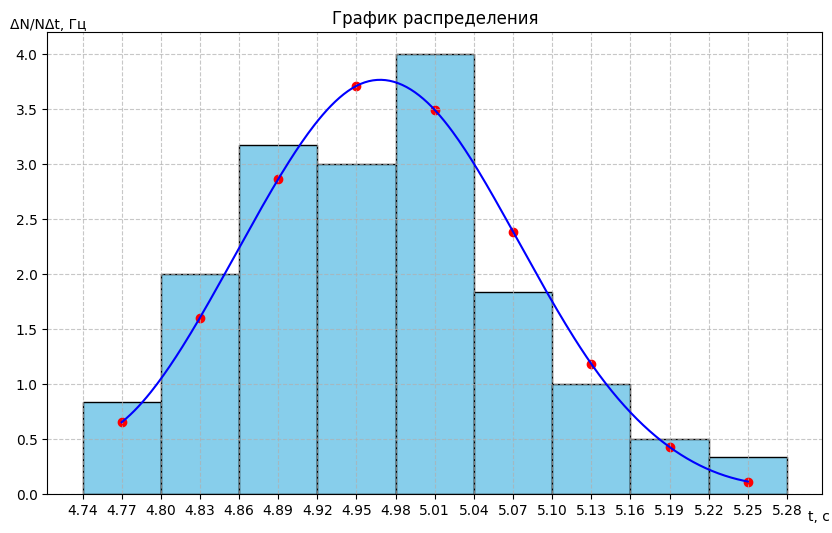

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Создаем график
plt.figure(figsize=(10, 6))

# Извлекаем границы и высоты
left_edges = [x[0] for x in gist_data]
heights = [x[1] for x in gist_data]
widths = [m_t_delta for _ in gist_data]
# Создаем гистограмму
plt.bar(left_edges, heights, width=widths, 
        color='skyblue', edgecolor='black', label='Гистограмма')

# Ваши данные
x = np.array([x[0] for x in gist_data])
y = np.array([x[2] for x in gist_data])
# Создаем сглаженную кривую с правильными границами
spline = make_interp_spline(x, y, k=3, bc_type='not-a-knot')
x_new = np.linspace(min(x), max(x), 300)
y_new = spline(x_new)
# Создаем график
plt.plot(x_new, y_new, 'b-', label='Кривая по Гаусу')
plt.scatter(x, y, color='red', label='Исходные точки по Гаусу')


# Добавляем сетку
plt.grid(True, which='both', linestyle='--', alpha=0.7)
# Настраиваем подписи осей
plt.xlabel('t, c', x=1.01, ha='right', va='bottom')
plt.ylabel('ΔN/NΔt, Гц', y=1.03, ha='left', va='top', rotation=0)
# Устанавливаем масштаб по оси X
ticks = np.arange(m_t_min, m_t_min + m_t_delta * m, m_t_delta / 2)
# Настраиваем ось X
plt.gca().xaxis.set_major_locator(plt.FixedLocator(ticks))

# Добавляем заголовок
plt.title('График распределения')
# plt.legend()

# Показываем график
plt.show()